In [9]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../data/annual_sp_returns_history.csv", header=None, names=["year", "return"])
df.head()


,year,return
0,2023,26.29
1,2022,-18.11
2,2021,28.71
3,2020,18.40
4,2019,31.49


In [19]:
df.shape

(98, 2)

In [17]:
df["return"].mean(), df["return"].std()

(12.159489795918367, 19.723112998077823)

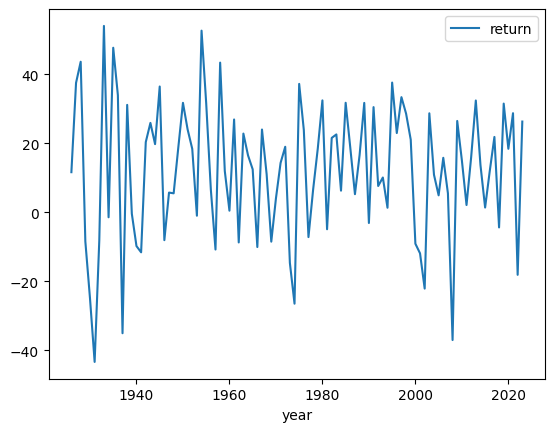

In [18]:
df.plot.line(x="year", y="return");

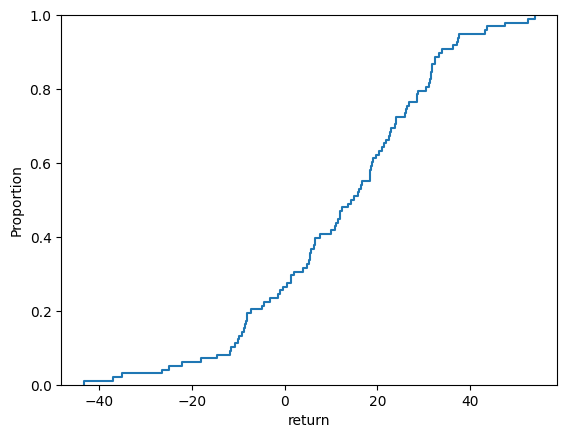

In [10]:
sns.ecdfplot(df["return"]);

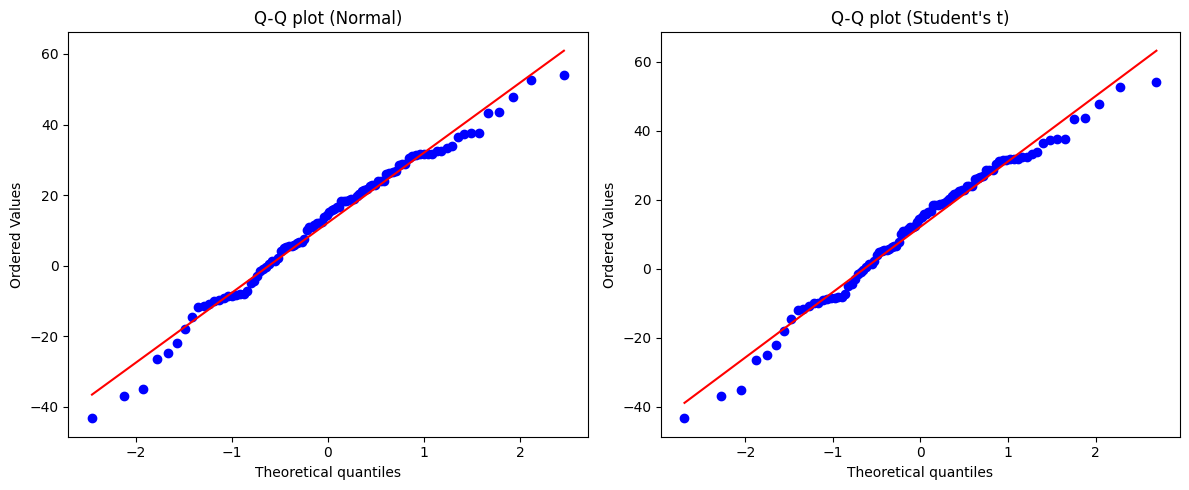

Shapiro-Wilk test p-value: 0.2288
Normal distribution parameters: mean=12.1595, std=19.6222
Student's t-distribution parameters: df=19.6222, loc=1413958839.8148, scale=12.1595


In [13]:
# ... existing code ...

# Import necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df["return"])

# Fit normal and t-distributions
params_norm = stats.norm.fit(df["return"])
params_t = stats.t.fit(df["return"])

# Create Q-Q plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot for normal distribution
stats.probplot(df["return"], dist="norm", plot=ax1)
ax1.set_title("Q-Q plot (Normal)")

# Q-Q plot for t-distribution
stats.probplot(df["return"], dist="t", sparams=params_t[2], plot=ax2)
ax2.set_title("Q-Q plot (Student's t)")

plt.tight_layout()
plt.show()

# Print test results
print(f"Shapiro-Wilk test p-value: {shapiro_test.pvalue:.4f}")
print(f"Normal distribution parameters: mean={params_norm[0]:.4f}, std={params_norm[1]:.4f}")
print(f"Student's t-distribution parameters: df={params_t[2]:.4f}, loc={params_t[0]:.4f}, scale={params_t[1]:.4f}")

# ... existing code ...

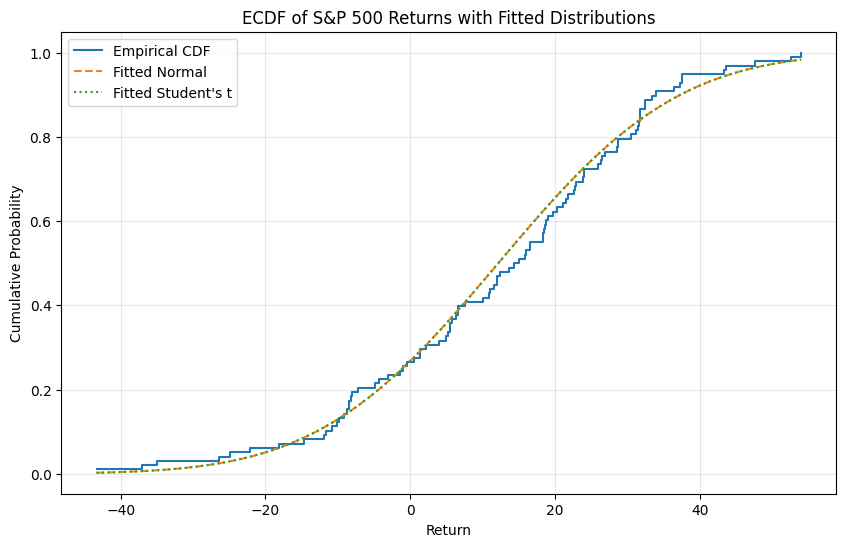

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot empirical CDF
x = np.sort(df["return"])
y = np.arange(1, len(x) + 1) / len(x)
ax.step(x, y, label="Empirical CDF", where="post")

# Plot fitted Normal CDF
x_norm = np.linspace(min(x), max(x), 100)
ax.plot(x_norm, stats.norm.cdf(x_norm, *params_norm), 
        label="Fitted Normal", linestyle="--")

# Plot fitted Student's t CDF
ax.plot(x_norm, stats.t.cdf(x_norm, *params_t), 
        label="Fitted Student's t", linestyle=":")

ax.set_xlabel("Return")
ax.set_ylabel("Cumulative Probability")
ax.set_title("ECDF of S&P 500 Returns with Fitted Distributions")
ax.legend()
plt.grid(True, alpha=0.3)

In [28]:
all_df = pd.read_csv("../data/historic_sp_bond_annual_growth.csv")
for column in all_df.columns[1:]:
    all_df[column] = all_df[column].apply(lambda x: x.split("%")[0]).astype(float) / 100
all_df.head()


,Year,S&P 500,3-month T.Bill,US T. Bond (10-year),Baa Corporate Bond,Real Estate,Gold,Inflation Rate,S&P 500 Real Returns,3-month T. Bill Real Returns,10-year T.Bonds Real Returns,Baa Corp Bonds Real Returns,Real Estate Real Returns,Gold Real Returns
0,1928,0.4381,0.0308,0.0084,0.0322,0.0149,0.0010,-0.0116,0.4549,0.0429,0.0201,0.0443,0.0268,0.0127
1,1929,-0.0830,0.0316,0.0420,0.0302,-0.0206,-0.0015,0.0058,-0.0883,0.0256,0.0360,0.0242,-0.0263,-0.0073
2,1930,-0.2512,0.0455,0.0454,0.0054,-0.0430,0.0010,-0.0640,-0.2001,0.1169,0.1168,0.0741,0.0224,0.0694
3,1931,-0.4384,0.0231,-0.0256,-0.1568,-0.0815,-0.1738,-0.0932,-0.3807,0.1282,0.0745,-0.0702,0.0129,-0.0890
4,1932,-0.0864,0.0107,0.0879,0.2359,-0.1047,0.2128,-0.1027,0.0182,0.1264,0.2125,0.3774,-0.0021,0.3516


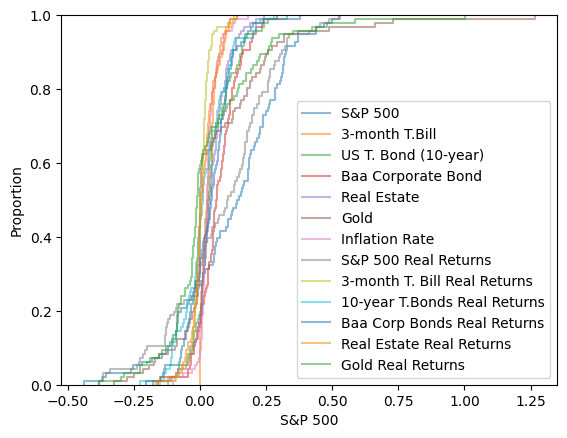

In [29]:
for column in all_df.columns[1:]:
    sns.ecdfplot(all_df[column], label=column, alpha=0.5);
plt.legend();

In [30]:
all_df["Inflation Rate"].mean(), all_df["Inflation Rate"].std()

(0.031190625, 0.03923474850348322)